In [128]:
import geopandas as gpd
from shapely import Polygon
import matplotlib.pyplot as plt
from skmob.tessellation import tilers
import matplotlib.pyplot as plt
import seaborn as sns
import math
from shapely import Point
from statannotations.Annotator import Annotator
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':200})
sns.set_palette(sns.color_palette("colorblind"))


In [48]:
data = gp.read_file("data/geolife/geolife_raw.geojson", geometry='geometry')

In [121]:
data[data.start_t.str[:4] == '2008'].traj_id.nunique()

6291

# Loss curves E2DTC

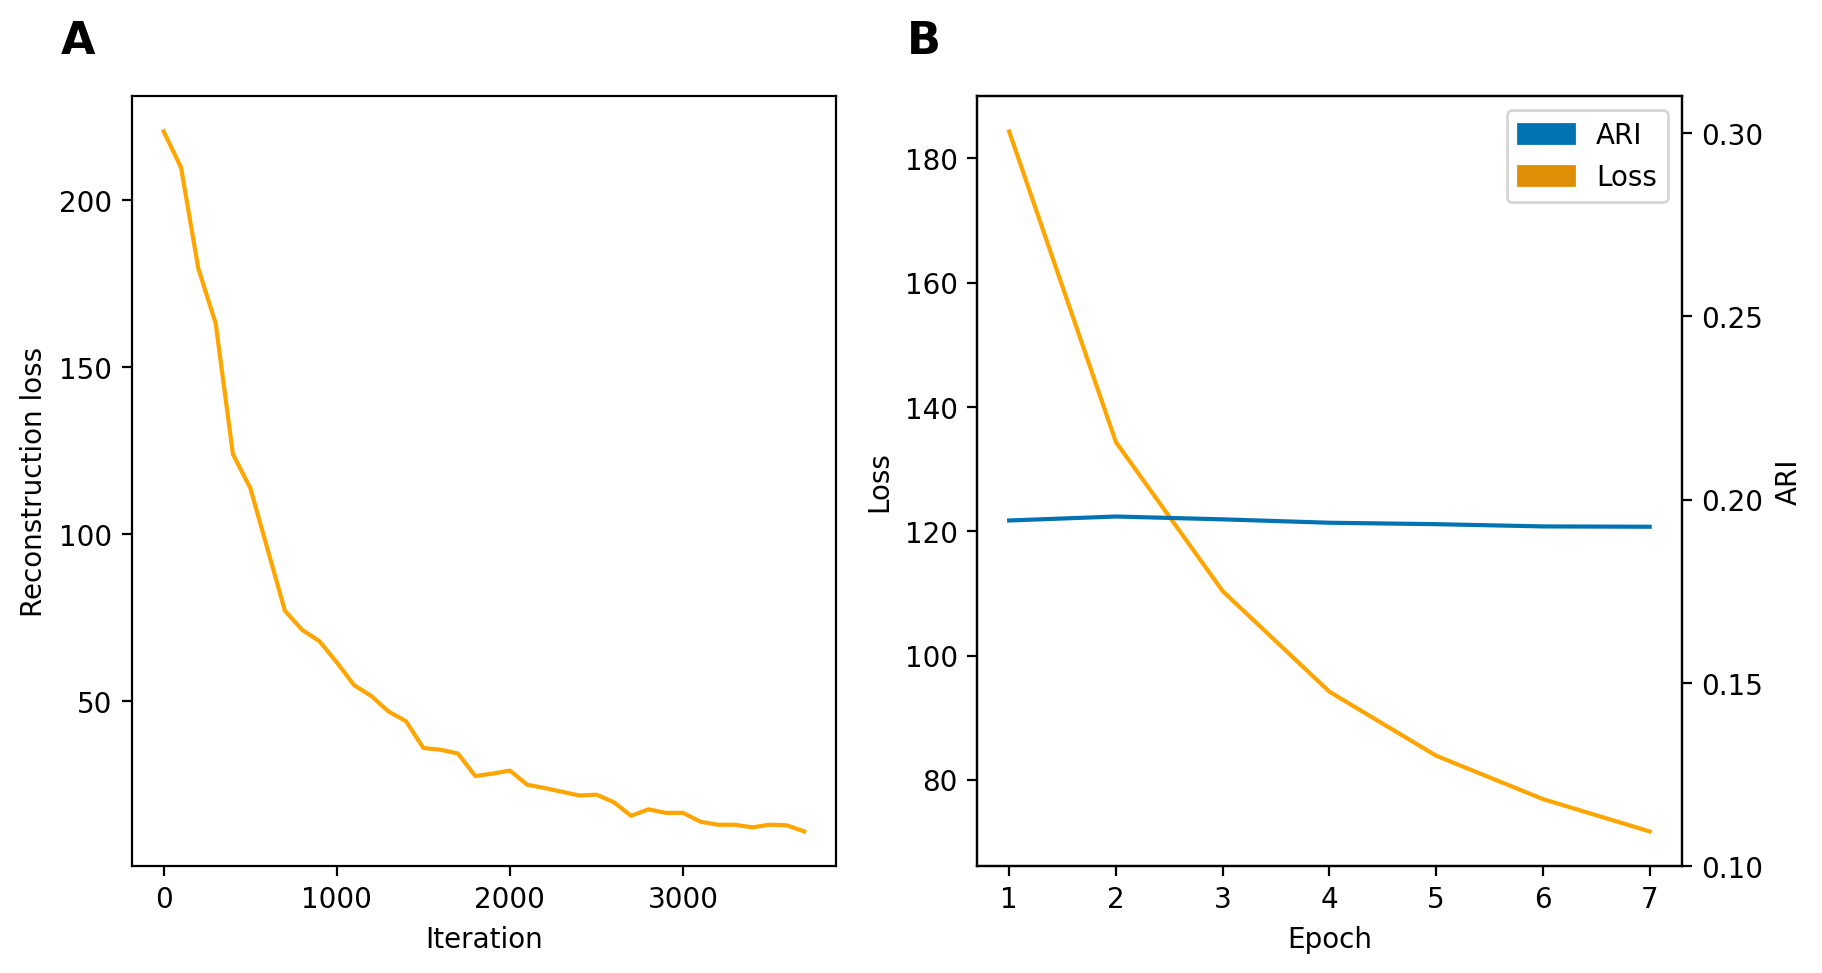

In [126]:
freemove_loss_pretrain = pd.read_csv('data/freemove/E2DTC_pretrain_metrics.csv')
freemove_loss_train = pd.read_csv('data/freemove/E2DTC_train_metrics.csv')

fig, axs = plt.subplots(ncols=2, figsize=(10,5))

ax1 = sns.lineplot(x="iteration", y="reconstruction_loss", data=freemove_loss_pretrain, ax=axs[0], color="orange")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Reconstruction loss")

ax2 = sns.lineplot(x="epoch", y="loss", data=freemove_loss_train.iloc[1:,:], ax=axs[1], color="orange")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")

ax2 = axs[1].twinx()
ax2.set_ylim(0.1, 0.31)
ax2.set_yticks(np.arange(0.1, 0.31, 0.05))
sns.lineplot(x="epoch", y="ari", data=freemove_loss_train.iloc[1:,:], ax=ax2)
ax2.set_ylabel("ARI")


import matplotlib.patches as mpatches
loss_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[0], label='ARI')
ari_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[1], label='Loss')
ax2.legend(handles=[loss_patch, ari_patch], fontsize=10)

# Loop through each subplot and add labels
for i, ax in enumerate(axs.flat):
    # Add the subplot label with bold font, aligned to the left, and only showing the letter
    ax.text(-0.1, 1.1, chr(65+i), transform=ax.transAxes, fontsize=16, fontweight='bold', ha='left', va='top')

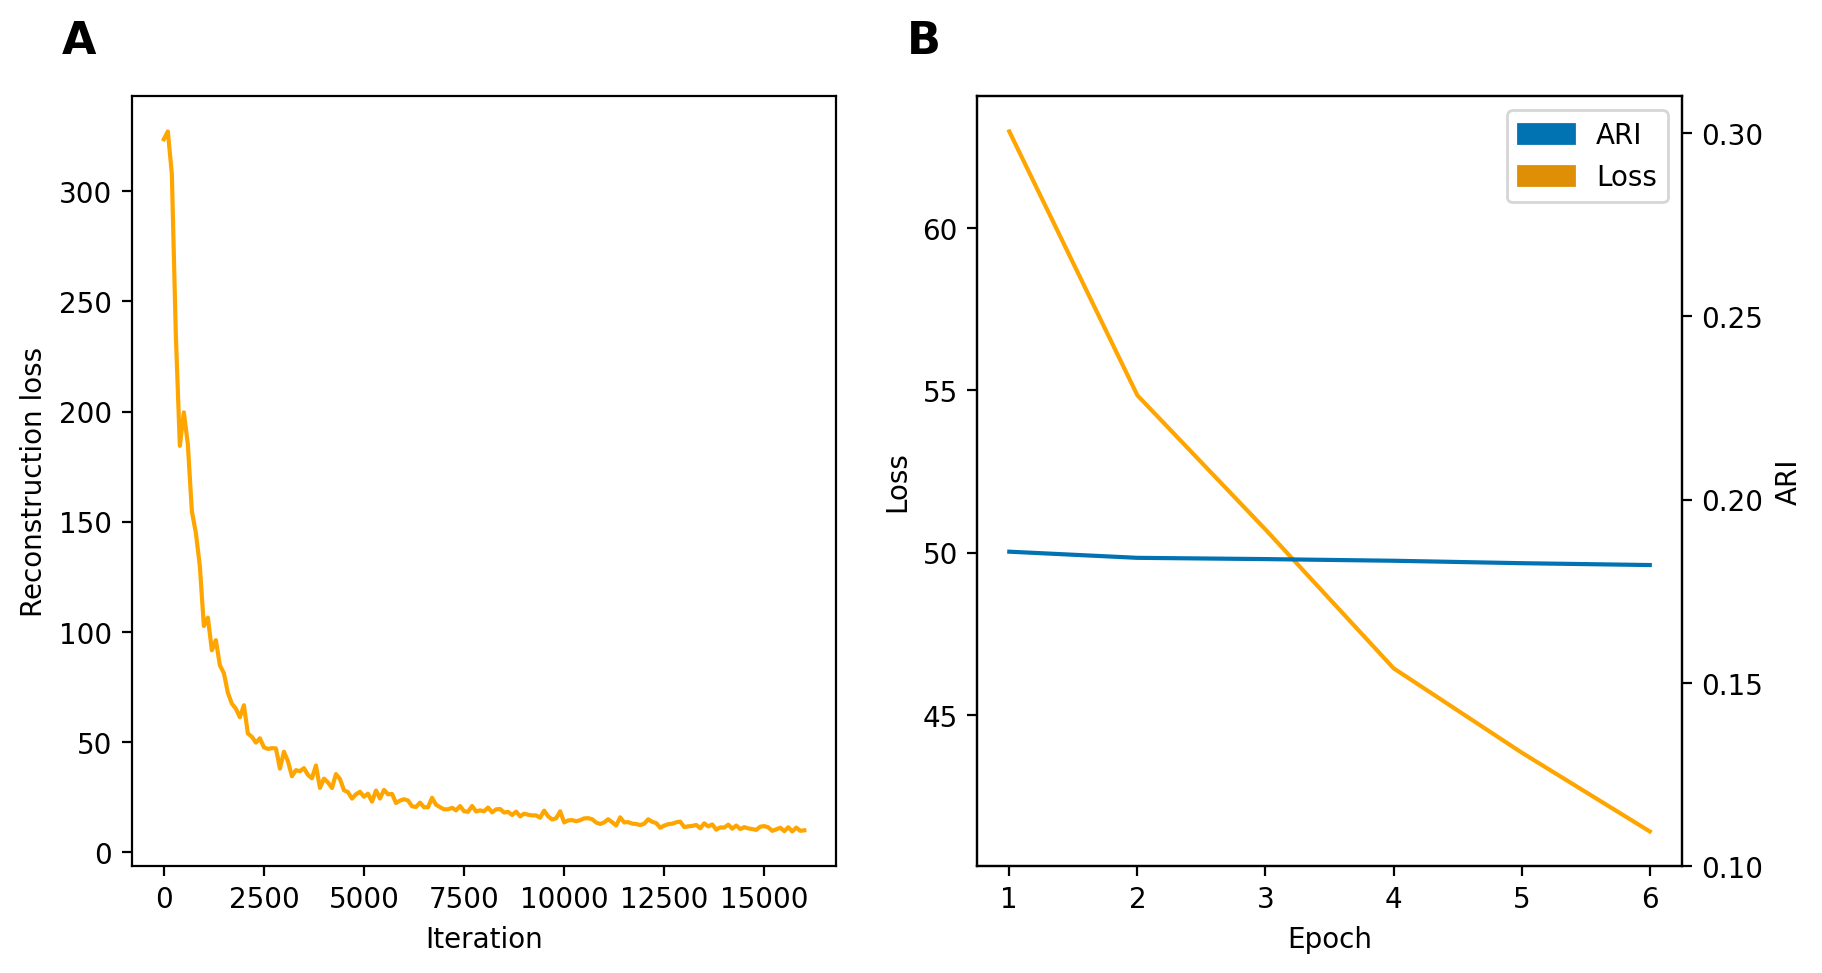

In [127]:
geolife_loss_pretrain = pd.read_csv('data/geolife/E2DTC_pretrain_metrics.csv')
geolife_loss_train = pd.read_csv('data/geolife/E2DTC_train_metrics.csv')

fig, axs = plt.subplots(ncols=2, figsize=(10,5))

ax1 = sns.lineplot(x="iteration", y="reconstruction_loss", data=geolife_loss_pretrain, ax=axs[0], color="orange")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Reconstruction loss")

ax2 = sns.lineplot(x="epoch", y="loss", data=geolife_loss_train.iloc[1:,:], ax=axs[1], color="orange")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")

ax2 = axs[1].twinx()
ax2.set_ylim(0.1, 0.31)
ax2.set_yticks(np.arange(0.1, 0.31, 0.05))
sns.lineplot(x="epoch", y="ari", data=geolife_loss_train.iloc[1:,:], ax=ax2)
ax2.set_ylabel("ARI")

loss_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[0], label='ARI')
ari_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[1], label='Loss')
ax2.legend(handles=[loss_patch, ari_patch], fontsize=10)

# Loop through each subplot and add labels
for i, ax in enumerate(axs.flat):
    # Add the subplot label with bold font, aligned to the left, and only showing the letter
    ax.text(-0.1, 1.1, chr(65+i), transform=ax.transAxes, fontsize=16, fontweight='bold', ha='left', va='top')

# Plot tessellation example

In [ ]:
tessellation = tilers.tiler.get("squared", base_shape="Beijing, China", meters=200)

In [ ]:
tessellation.explore(cmap="Set1", tiles="CartoDB positron")

# Dissolving tiles example

In [129]:
tessellation_freemove = gpd.read_file("data/freemove/tessellation_freemove_200.geojson", geometry='geometry')

In [130]:
# create plot for dissolving demo for set of random tiles of tessellation
exp_tiles = tessellation_freemove.query('tile_id in ["295512", "295511", "296155", "296156", "296157", "296154"]')
exp_tiles.explore(tiles="CartoDB positron")

In [131]:
import libpysal

# create spatial weights matrix
W = libpysal.weights.Queen.from_dataframe(exp_tiles)

# get component labels
components = W.component_labels

exp_tiles_dissolved = exp_tiles.dissolve(by=components)

exp_tiles_dissolved.explore(tiles="CartoDB positron")